<a href="https://colab.research.google.com/github/MrVeGGi3/AI-for-Games/blob/main/SE_Pok%C3%A9mon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Roteiro para uso de Sistema Especialista**

Baseado no jogo "Pokémon", cada tipo de Pokémon possui um atributo específico que define sua classe. Nesse caso, irei criar atribuições diferentes do game para atribuir o tipo para o "Pokémon" do jogador.

Tipo Fada

  Característica: Misto & Cor: Rosa

Tipo Dragão

  Característica: Misto & Cor: Vermelho

Tipo Fantasma

  Característica: Voador & Cor: Roxo

Tipo Psíquico

  Característica: Misto & Cor: Roxo

Tipo Lutador:

  Característica: Chão & Cor: Marrom

Tipo Água:

  Característica: Nadador & Cor: Azul



Cada Pokémon normalmente aparece em um local específico e apropriado para sua classe.

Fada -> Campo.

Dragão -> Lava.

Fantasma -> Cemitério.

Lutador -> Deserto.

Água -> Lago.

Psiquíco -> Cidade.

In [1]:
!pip install durable-rules
!pip install networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 982.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for durable-rules: filename=durable_rules-2.0.28-cp310-cp310-linux_x86_64.whl size=199321 sha256=7da7572f8ddd2380feb1f1172bac905cd06d93bb31a4d6693dee73fae2a88b23
  Stored in directory: /root/.cache/pip/wheels/f6/b4/6c/ee50ba2f212686ca9c6fdae66f5030f2f37cc9178a38503f69
Successfully built durable-rules


**Uso da Biblioteca "Durable Rules"**

In [9]:
from durable.lang import ruleset, when_all, post, m, assert_fact, c

with ruleset('class_rules'):
  try:
    @when_all((m.caracteristica == 'Misto') & (m.cor == 'Rosa'))
    def Fada(c):
      c.assert_fact({'habitat': 'Campo'})

    @when_all((m.caracteristica == 'Misto') & (m.cor == 'Vermelho'))
    def Dragão(c):
      c.assert_fact({'habitat': 'Lava'})

    @when_all((m.caracteristica == 'Voador') & (m.cor == 'Roxo'))
    def Fantasma(c):
      c.assert_fact({'habitat': 'Cemitério'})

    @when_all((m.caracteristica == 'Misto') & (m.cor == 'Roxo'))
    def Psiquico(c):
      c.assert_fact({'habitat': 'Cidade'})

    @when_all((m.caracteristica == 'Chão') & (m.cor == 'Marrom'))
    def Lutador(c):
      c.assert_fact({'habitat': 'Deserto'})

    @when_all((m.caracteristica == 'Nadador') & (m.cor == 'Azul'))
    def Agua(c):
      c.assert_fact({'habitat': 'Lago'})

    @when_all(+m.habitat)
    def saida(c):
       print(f"O local sugerido é: {c.m.habitat}")

    @when_all(+m.caracteristica)
    def default(c):
        print(f"Habitat não identificado para a temperatura: {c.m.caracteristica} e umidade: {c.m.cor}")
  except Exception as e:
    print(f"Erro ao registrar o ruleset: {e}")



**Teste de Inferência**

In [11]:
post('class_rules', {'caracteristica': 'Misto', 'cor' : 'Roxo'})

O local sugerido é: Cidade


{'sid': '0', 'id': 'sid-0', '$s': 1}

**Rede Semântica**

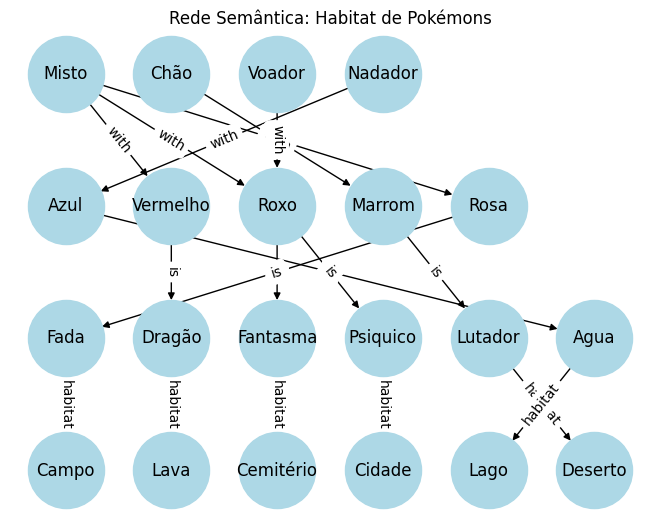

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

def create_semantic_network():
  G = nx.DiGraph()
  #Nós para Características
  G.add_node("Misto", layer = 0)
  G.add_node("Chão", layer = 0)
  G.add_node("Voador", layer = 0)
  G.add_node("Nadador", layer = 0)

  #Nós para Cores
  G.add_node("Azul", layer = 1)
  G.add_node("Vermelho", layer = 1)
  G.add_node("Roxo", layer = 1)
  G.add_node("Marrom", layer = 1)
  G.add_node("Rosa", layer = 1)

  #Nós para Classes
  G.add_node("Fada", layer = 2)
  G.add_node("Dragão", layer = 2)
  G.add_node("Fantasma", layer = 2)
  G.add_node("Psiquico", layer = 2)
  G.add_node("Lutador", layer = 2)
  G.add_node("Agua", layer = 2)

  #Nós para Habitats
  G.add_node("Campo", layer = 3)
  G.add_node("Lava", layer = 3)
  G.add_node("Cemitério", layer = 3)
  G.add_node("Cidade", layer = 3)
  G.add_node("Lago", layer = 3)
  G.add_node("Deserto", layer = 3)

  #Conectar os Nós com as Arestas:
  G.add_edges_from([
        ("Misto", "Rosa", {"relation": "with" }),
        ("Rosa", "Fada", {"relation": "is" }),
        ("Fada", "Campo", {"relation": "habitat"}),

        ("Misto", "Vermelho", {"relation": "with" }),
        ("Vermelho", "Dragão", {"relation": "is" }),
        ("Dragão", "Lava", {"relation": "habitat"}),

        ("Voador", "Roxo", {"relation": "with" }),
        ("Roxo", "Fantasma", {"relation": "is" }),
        ("Fantasma", "Cemitério", {"relation": "habitat"}),

        ("Misto", "Roxo", {"relation": "with" }),
        ("Roxo", "Psiquico", {"relation": "is" }),
        ("Psiquico", "Cidade", {"relation": "habitat"}),

        ("Chão", "Marrom", {"relation": "with" }),
        ("Marrom", "Lutador", {"relation": "is" }),
        ("Lutador", "Deserto", {"relation": "habitat"}),

        ("Nadador", "Azul", {"relation": "with" }),
        ("Azul", "Agua", {"relation": "is" }),
        ("Agua", "Lago", {"relation": "habitat"}),
      ])

  return G

def draw_network(G):
    # Posicionando os nós por camada
    pos = {}
    layers = {0: [], 1: [], 2: [], 3:[]}
    for node, data in G.nodes(data=True):
        layers[data['layer']].append(node)

    for layer, nodes in layers.items():
        y = 1 - layer  #gato
        for x, node in enumerate(nodes):
            pos[node] = (x, y)

    # Desenhando o grafo
    nx.draw(G, pos, with_labels=True, arrows=True, node_color='lightblue', node_size=3000)
    labels = nx.get_edge_attributes(G, 'relation')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Rede Semântica: Habitat de Pokémons")
    plt.show()
# Criando e desenhando a rede semântica
G = create_semantic_network()
draw_network(G)